In [2]:
import numpy as np
import pandas as pd
from numpy.random import uniform
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization, MaxPooling2D, Flatten
#from keras.layers.convolutional import Conv2D, Conv1D
# import libraries
import pandas as pd
from sklearn.svm import OneClassSVM
from numpy import where
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
from google.colab import files

# Ganomaly https://github.com/leafinity/keras_ganomaly/blob/master/ganomaly.ipynb
from keras import layers
import keras
import keras.backend as K

In [52]:
data1=pd.read_csv('cardio_alco.csv')
data1.head(5)
data1.describe()


,id;alco
count,56903
unique,56903
top,44;0
freq,1


In [88]:
data2=pd.read_csv('cardio_base.csv')
data2.head(5)
data2_q1=data2[['height']]
data_height=data2_q1.to_numpy()


,height
count,70000.000000
mean,164.359229
std,8.210126
min,55.000000
25%,159.000000
50%,165.000000
75%,170.000000
max,250.000000


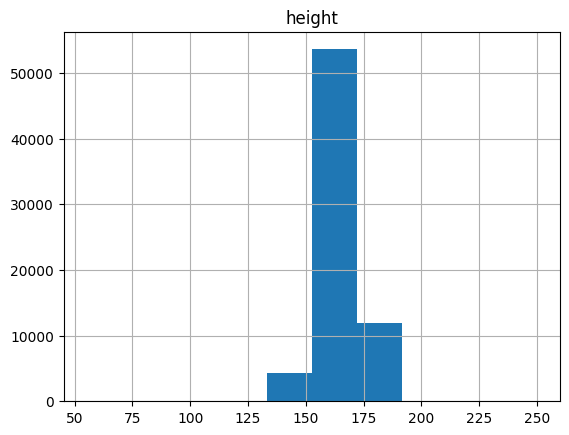

In [96]:
data2_q1.hist()
data2_q1.describe()

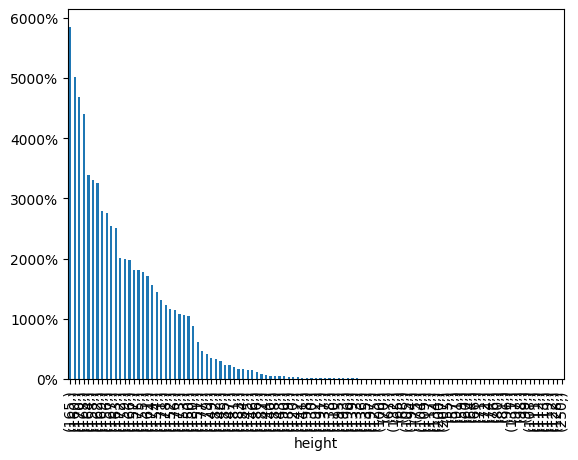

In [101]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
ax = data2_q1.value_counts().plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [94]:
d1=data_height.percentile()
np.percentile(d1, 50)

AttributeError: ignored

In [84]:
data2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [76]:
data2_age=data2_q1.age.to_numpy()
data2_age

array([18393, 20228, 18857, ..., 19066, 22431, 20540])

In [ ]:
data2_c1=

In [50]:
data1

KeyError: ignored

In [45]:
data2_q112=data2[data2['weight'] == 200.0 ]
data2_q11

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
57858,82567,18804,2,165,10.0,180,1100,2,0


In [28]:
data_2_array=data2.weight.unique()
print(data_2_array.min())
print(data_2_array.max())

10.0
200.0


In [47]:
print(np.sort(data_2_array))


[ 10.    11.    21.    22.    23.    28.    29.    30.    31.    32.
  33.    34.    35.    35.45  36.    37.    38.    39.    40.    41.
  42.    42.2   43.    44.    45.    45.8   46.    47.    48.    49.
  50.    50.5   50.7   51.    51.5   52.    52.3   53.    53.2   53.3
  53.5   53.6   53.67  53.9   54.    54.35  54.5   54.9   55.    55.2
  55.4   55.6   56.    56.2   57.    57.4   57.6   57.8   58.    58.5
  58.7   58.8   59.    59.2   59.5   59.8   60.    60.1   60.2   60.5
  60.6   61.    61.2   61.3   61.5   62.    62.2   62.3   62.4   62.5
  62.7   63.    63.4   63.8   63.82  64.    64.1   64.3   64.5   64.7
  64.8   65.    65.3   65.5   66.    66.3   66.4   66.5   67.    67.3
  67.5   67.8   67.9   68.    68.2   68.3   68.4   68.5   68.9   69.
  69.5   69.8   70.    70.2   70.3   70.5   70.7   70.8   71.    71.2
  71.3   71.5   72.    72.1   72.5   72.8   73.    73.2   73.5   73.8
  74.    74.2   74.3   74.5   74.77  75.    75.2   75.5   75.6   76.
  76.5   76.7   76.8   77

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>],
       [<Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'smoke'}>]], dtype=object)

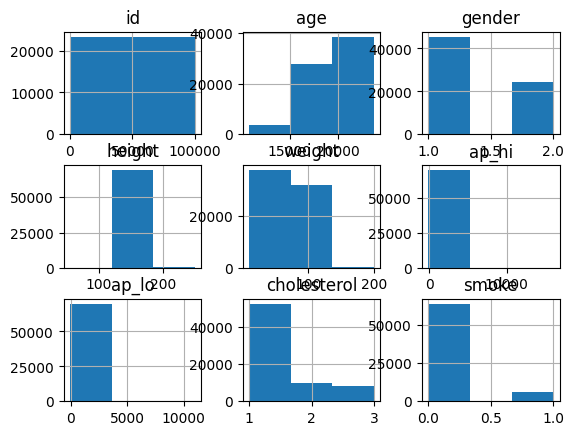

In [18]:
data2.hist(bins=3)

In [106]:
data3=pd.read_csv('covid_data.csv')
data3.head(5)
data4=data3[['date']]
data3

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [20]:
data3.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


In [ ]:
!pip install mat4py
from mat4py import loadmat

In [ ]:
data = loadmat('lympho.mat')
data=pd.DataFrame.from_dict(data)
data.to_csv('data.csv')
from google.colab import files
files.download("data.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.X

0      [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
1      [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, ...
2      [3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, ...
3      [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 3.0, ...
4      [3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, ...
                             ...                        
143    [4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, ...
144    [2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, ...
145    [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, ...
146    [3.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, ...
147    [2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, ...
Name: X, Length: 148, dtype: object

In [ ]:
# It takes 20 minutes history for each survellience data
train_test_totals_modified_rpm1=pd.read_excel('train_test_totals_modified_rpm.xlsx')
train_test_totals_modified_rpm1=train_test_totals_modified_rpm1.drop(['Position', 'RPM','datetime'], axis=1)
# Generating 5% suspected dataset based one class SVM. one class SVM applied on survellience data only.
svm_model1 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .05).fit(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
y_pred_1 = svm_model1.predict(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
outlier_index_05 = where(y_pred_1 == -1)
normal_index_05 = where(y_pred_1 == 1)
svm_outlier_05 = train_test_totals_modified_rpm1.iloc[outlier_index_05]
svm_normal_05=train_test_totals_modified_rpm1.iloc[normal_index_05]
svm_model2 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .10).fit(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
y_pred_2 = svm_model2.predict(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
outlier_index_10 = where(y_pred_2 == -1)
normal_index_10 = where(y_pred_2 == 1)
svm_outlier_10 = train_test_totals_modified_rpm1.iloc[outlier_index_10]
svm_normal_10=train_test_totals_modified_rpm1.iloc[normal_index_10]
svm_model3 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .15).fit(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
y_pred_3 = svm_model3.predict(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
outlier_index_15 = where(y_pred_3 == -1)
normal_index_15 = where(y_pred_3 == 1)
svm_outlier_15 = train_test_totals_modified_rpm1.iloc[outlier_index_15]
svm_normal_15 = train_test_totals_modified_rpm1.iloc[normal_index_15]
svm_model4 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .20).fit(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
y_pred_4 = svm_model4.predict(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
outlier_index_20 = where(y_pred_4 == -1)
normal_index_20 = where(y_pred_4 == 1)
svm_outlier_20 = train_test_totals_modified_rpm1.iloc[outlier_index_20]
svm_normal_20 = train_test_totals_modified_rpm1.iloc[normal_index_20]
svm_model5 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .25).fit(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
y_pred_5 = svm_model5.predict(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
outlier_index_25 = where(y_pred_5 == -1)
normal_index_25  = where(y_pred_5 == 1)
svm_outlier_25 = train_test_totals_modified_rpm1.iloc[outlier_index_25]
svm_normal_25 = train_test_totals_modified_rpm1.iloc[normal_index_25]
svm_model6 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .30).fit(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
y_pred_6 = svm_model6.predict(train_test_totals_modified_rpm1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']])
outlier_index_30 = where(y_pred_6 == -1)
normal_index_30  = where(y_pred_6 == 1)
svm_outlier_30 = train_test_totals_modified_rpm1.iloc[outlier_index_30]
svm_normal_30= train_test_totals_modified_rpm1.iloc[normal_index_30]

In [ ]:
normal_index_30_list=np.asarray(normal_index_30).reshape(np.asarray(normal_index_30).shape[1],).tolist()
normal_index_25_list=np.asarray(normal_index_25).reshape(np.asarray(normal_index_25).shape[1],).tolist()
normal_index_20_list=np.asarray(normal_index_20).reshape(np.asarray(normal_index_20).shape[1],).tolist()
normal_index_15_list=np.asarray(normal_index_15).reshape(np.asarray(normal_index_15).shape[1],).tolist()
normal_index_10_list=np.asarray(normal_index_10).reshape(np.asarray(normal_index_10).shape[1],).tolist()
normal_index_05_list=np.asarray(normal_index_05).reshape(np.asarray(normal_index_05).shape[1],).tolist()
outlier_index_30_list=np.asarray(outlier_index_30).reshape(np.asarray(outlier_index_30).shape[1],).tolist()
outlier_index_25_list=np.asarray(outlier_index_25).reshape(np.asarray(outlier_index_25).shape[1],).tolist()
outlier_index_20_list=np.asarray(outlier_index_20).reshape(np.asarray(outlier_index_20).shape[1],).tolist()
outlier_index_15_list=np.asarray(outlier_index_15).reshape(np.asarray(outlier_index_15).shape[1],).tolist()
outlier_index_10_list=np.asarray(outlier_index_10).reshape(np.asarray(outlier_index_10).shape[1],).tolist()
outlier_index_05_list=np.asarray(outlier_index_05).reshape(np.asarray(outlier_index_05).shape[1],).tolist()

In [ ]:
train_test_totals_modified_rpm=pd.read_excel('train_test_totals_modified_rpm.xlsx')

In [ ]:
numbers=[]
for i in range(458):
  for j in range(10):
    numbers.append(i+j)
numbers = numbers[:len(numbers)-90]
sensors = train_test_totals_modified_rpm.iloc[numbers,0:10]
survellience = train_test_totals_modified_rpm.iloc[:,23:29]
survellience1=survellience.loc[train_test_totals_modified_rpm.index.repeat(10)].reset_index(drop=True)
survellience2=survellience1.iloc[0:4490,:]
survellience2.reset_index(drop=True, inplace=True)
sensors.reset_index(drop=True, inplace=True)
all=pd.concat([sensors, survellience2], axis = 1)
all=all.iloc[:,0:16]

In [ ]:
svm_normal_05_numbers=[]
for i in range(435):
  for j in range(10):
    svm_normal_05_numbers.append(i+j)
svm_normal_05_numbers = svm_normal_05_numbers[:len(svm_normal_05_numbers)-90]
svm_normal_05_sensors = svm_normal_05.iloc[svm_normal_05_numbers,0:10]
svm_normal_05_survellience = svm_normal_05.iloc[:,20:26]
svm_normal_05_survellience1=svm_normal_05_survellience.loc[svm_normal_05.index.repeat(10)]
svm_normal_05_survellience2=svm_normal_05_survellience1.iloc[0:4260,:]
svm_normal_05_survellience2=svm_normal_05_survellience2.reset_index()
svm_normal_05_survellience2=svm_normal_05_survellience2.iloc[:,1:]
svm_normal_05_sensors=svm_normal_05_sensors.reset_index()
svm_normal_05_sensors=svm_normal_05_sensors.iloc[:,1:]
svm_normal_05_all=pd.concat([svm_normal_05_sensors, svm_normal_05_survellience2], axis = 1)
svm_normal_05_all=svm_normal_05_all.iloc[:,0:16]

In [ ]:
print(svm_normal_15.shape)
print(svm_normal_20.shape)
print(svm_normal_25.shape)
print(svm_normal_30.shape)
print(svm_outlier_15.shape)
print(svm_outlier_20.shape)
print(svm_outlier_25.shape)
print(svm_outlier_30.shape)


(390, 27)
(361, 27)
(338, 27)
(322, 27)
(68, 27)
(97, 27)
(120, 27)
(136, 27)


In [ ]:
svm_normal_10_numbers=[]
for i in range(411):
  for j in range(10):
    svm_normal_10_numbers.append(i+j)
svm_normal_10_numbers = svm_normal_10_numbers[:len(svm_normal_10_numbers)-90]
svm_normal_10_sensors = svm_normal_10.iloc[svm_normal_10_numbers,0:10]
svm_normal_10_survellience = svm_normal_10.iloc[:,20:26]
svm_normal_10_survellience1=svm_normal_10_survellience.loc[svm_normal_10.index.repeat(10)]
svm_normal_10_survellience2=svm_normal_10_survellience1.iloc[0:4020,:]
svm_normal_10_survellience2=svm_normal_10_survellience2.reset_index()
svm_normal_10_survellience2=svm_normal_10_survellience2.iloc[:,1:]
svm_normal_10_sensors=svm_normal_10_sensors.reset_index()
svm_normal_10_sensors=svm_normal_10_sensors.iloc[:,1:]
svm_normal_10_all=pd.concat([svm_normal_10_sensors, svm_normal_10_survellience2], axis = 1)
svm_normal_10_all=svm_normal_10_all.iloc[:,0:16]

In [ ]:
svm_normal_10_numbers=[]
for i in range(411):
  for j in range(10):
    svm_normal_10_numbers.append(i+j)
svm_normal_10_numbers = svm_normal_10_numbers[:len(svm_normal_10_numbers)-90]
svm_normal_10_sensors = svm_normal_10.iloc[svm_normal_10_numbers,0:10]
svm_normal_10_survellience = svm_normal_10.iloc[:,20:26]
svm_normal_10_survellience1=svm_normal_10_survellience.loc[svm_normal_10.index.repeat(10)]
svm_normal_10_survellience2=svm_normal_10_survellience1.iloc[0:4020,:]
svm_normal_10_survellience2=svm_normal_10_survellience2.reset_index()
svm_normal_10_survellience2=svm_normal_10_survellience2.iloc[:,1:]
svm_normal_10_sensors=svm_normal_10_sensors.reset_index()
svm_normal_10_sensors=svm_normal_10_sensors.iloc[:,1:]
svm_normal_10_all=pd.concat([svm_normal_10_sensors, svm_normal_10_survellience2], axis = 1)
svm_normal_10_all=svm_normal_10_all.iloc[:,0:16]

In [ ]:
svm_normal_15_numbers=[]
for i in range(390):
  for j in range(10):
    svm_normal_15_numbers.append(i+j)
svm_normal_15_numbers = svm_normal_15_numbers[:len(svm_normal_15_numbers)-90]
svm_normal_15_sensors = svm_normal_15.iloc[svm_normal_15_numbers,0:10]
svm_normal_15_survellience = svm_normal_15.iloc[:,20:26]
svm_normal_15_survellience1=svm_normal_15_survellience.loc[svm_normal_15.index.repeat(10)]
svm_normal_15_survellience2=svm_normal_15_survellience1.iloc[0:3810,:]
svm_normal_15_survellience2=svm_normal_15_survellience2.reset_index()
svm_normal_15_survellience2=svm_normal_15_survellience2.iloc[:,1:]
svm_normal_15_sensors=svm_normal_15_sensors.reset_index()
svm_normal_15_sensors=svm_normal_15_sensors.iloc[:,1:]
svm_normal_15_all=pd.concat([svm_normal_15_sensors, svm_normal_15_survellience2], axis = 1)
svm_normal_15_all=svm_normal_15_all.iloc[:,0:16]

In [ ]:
svm_normal_20_numbers=[]
for i in range(361):
  for j in range(10):
    svm_normal_20_numbers.append(i+j)
svm_normal_20_numbers = svm_normal_20_numbers[:len(svm_normal_20_numbers)-90]
svm_normal_20_sensors = svm_normal_20.iloc[svm_normal_20_numbers,0:10]
svm_normal_20_survellience = svm_normal_20.iloc[:,20:26]
svm_normal_20_survellience1=svm_normal_20_survellience.loc[svm_normal_20.index.repeat(10)]
svm_normal_20_survellience2=svm_normal_20_survellience1.iloc[0:3520,:]
svm_normal_20_survellience2=svm_normal_20_survellience2.reset_index()
svm_normal_20_survellience2=svm_normal_20_survellience2.iloc[:,1:]
svm_normal_20_sensors=svm_normal_20_sensors.reset_index()
svm_normal_20_sensors=svm_normal_20_sensors.iloc[:,1:]
svm_normal_20_all=pd.concat([svm_normal_20_sensors, svm_normal_20_survellience2], axis = 1)
svm_normal_20_all=svm_normal_20_all.iloc[:,0:16]

In [ ]:
svm_normal_25_numbers=[]
for i in range(338):
  for j in range(10):
    svm_normal_25_numbers.append(i+j)
svm_normal_25_numbers = svm_normal_25_numbers[:len(svm_normal_25_numbers)-90]
svm_normal_25_sensors = svm_normal_25.iloc[svm_normal_25_numbers,0:10]
svm_normal_25_survellience = svm_normal_25.iloc[:,20:26]
svm_normal_25_survellience1=svm_normal_25_survellience.loc[svm_normal_25.index.repeat(10)]
svm_normal_25_survellience2=svm_normal_25_survellience1.iloc[0:3290,:]
svm_normal_25_survellience2=svm_normal_25_survellience2.reset_index()
svm_normal_25_survellience2=svm_normal_25_survellience2.iloc[:,1:]
svm_normal_25_sensors=svm_normal_25_sensors.reset_index()
svm_normal_25_sensors=svm_normal_25_sensors.iloc[:,1:]
svm_normal_25_all=pd.concat([svm_normal_25_sensors, svm_normal_25_survellience2], axis = 1)
svm_normal_25_all=svm_normal_25_all.iloc[:,0:16]

In [ ]:
svm_normal_30_numbers=[]
for i in range(322):
  for j in range(10):
    svm_normal_30_numbers.append(i+j)
svm_normal_30_numbers = svm_normal_30_numbers[:len(svm_normal_30_numbers)-90]
svm_normal_30_sensors = svm_normal_30.iloc[svm_normal_30_numbers,0:10]
svm_normal_30_survellience = svm_normal_30.iloc[:,20:26]
svm_normal_30_survellience1=svm_normal_30_survellience.loc[svm_normal_30.index.repeat(10)]
svm_normal_30_survellience2=svm_normal_30_survellience1.iloc[0:3130,:]
svm_normal_30_survellience2=svm_normal_30_survellience2.reset_index()
svm_normal_30_survellience2=svm_normal_30_survellience2.iloc[:,1:]
svm_normal_30_sensors=svm_normal_30_sensors.reset_index()
svm_normal_30_sensors=svm_normal_30_sensors.iloc[:,1:]
svm_normal_30_all=pd.concat([svm_normal_30_sensors, svm_normal_30_survellience2], axis = 1)
svm_normal_30_all=svm_normal_30_all.iloc[:,0:16]

In [ ]:
len(svm_normal_30_numbers)

3130

In [ ]:
svm_normal_15.shape

(390, 27)

In [ ]:
print(svm_normal_15_numbers[-20:])
len(svm_normal_15_numbers)

[379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389]


3810

In [ ]:
svm_outlier_05_numbers=[]
for i in range(23):
  for j in range(10):
    svm_outlier_05_numbers.append(i+j)
svm_outlier_05_numbers = svm_outlier_05_numbers[:len(svm_outlier_05_numbers)-90]
svm_outlier_05_sensors = svm_outlier_05.iloc[svm_outlier_05_numbers,0:10]
svm_outlier_05_survellience = svm_outlier_05.iloc[:,20:26]
svm_outlier_05_survellience1=svm_outlier_05_survellience.loc[svm_outlier_05.index.repeat(10)]
svm_outlier_05_survellience2=svm_outlier_05_survellience1.iloc[0:140,:]
svm_outlier_05_survellience2=svm_outlier_05_survellience2.reset_index()
svm_outlier_05_survellience2=svm_outlier_05_survellience2.iloc[:,1:]
svm_outlier_05_sensors=svm_outlier_05_sensors.reset_index()
svm_outlier_05_sensors=svm_outlier_05_sensors.iloc[:,1:]
svm_outlier_05_all=pd.concat([svm_outlier_05_sensors, svm_outlier_05_survellience2], axis = 1)
svm_outlier_05_all=svm_outlier_05_all.iloc[:,0:16]

In [ ]:
svm_outlier_10_numbers=[]
for i in range(47):
  for j in range(10):
    svm_outlier_10_numbers.append(i+j)
svm_outlier_10_numbers = svm_outlier_10_numbers[:len(svm_outlier_10_numbers)-90]
svm_outlier_10_sensors = svm_outlier_10.iloc[svm_outlier_10_numbers,0:10]
svm_outlier_10_survellience = svm_outlier_10.iloc[:,20:26]
svm_outlier_10_survellience1=svm_outlier_10_survellience.loc[svm_outlier_10.index.repeat(10)]
svm_outlier_10_survellience2=svm_outlier_10_survellience1.iloc[0:380,:]
svm_outlier_10_survellience2=svm_outlier_10_survellience2.reset_index()
svm_outlier_10_survellience2=svm_outlier_10_survellience2.iloc[:,1:]
svm_outlier_10_sensors=svm_outlier_10_sensors.reset_index()
svm_outlier_10_sensors=svm_outlier_10_sensors.iloc[:,1:]
svm_outlier_10_all=pd.concat([svm_outlier_10_sensors, svm_outlier_10_survellience2], axis = 1)
svm_outlier_10_all=svm_outlier_10_all.iloc[:,0:16]

In [ ]:
svm_outlier_20_numbers=[]
for i in range(97):
  for j in range(10):
    svm_outlier_20_numbers.append(i+j)
svm_outlier_20_numbers = svm_outlier_20_numbers[:len(svm_outlier_20_numbers)-90]
svm_outlier_20_sensors = svm_outlier_20.iloc[svm_outlier_20_numbers,0:10]
svm_outlier_20_survellience = svm_outlier_20.iloc[:,20:26]
svm_outlier_20_survellience1=svm_outlier_20_survellience.loc[svm_outlier_20.index.repeat(10)]
svm_outlier_20_survellience2=svm_outlier_20_survellience1.iloc[0:880,:]
svm_outlier_20_survellience2=svm_outlier_20_survellience2.reset_index()
svm_outlier_20_survellience2=svm_outlier_20_survellience2.iloc[:,1:]
svm_outlier_20_sensors=svm_outlier_20_sensors.reset_index()
svm_outlier_20_sensors=svm_outlier_20_sensors.iloc[:,1:]
svm_outlier_20_all=pd.concat([svm_outlier_20_sensors, svm_outlier_20_survellience2], axis = 1)
svm_outlier_20_all=svm_outlier_20_all.iloc[:,0:16]


In [ ]:
svm_outlier_25_numbers=[]
for i in range(120):
  for j in range(10):
    svm_outlier_25_numbers.append(i+j)
svm_outlier_25_numbers = svm_outlier_25_numbers[:len(svm_outlier_25_numbers)-90]
svm_outlier_25_sensors = svm_outlier_25.iloc[svm_outlier_25_numbers,0:10]
svm_outlier_25_survellience = svm_outlier_25.iloc[:,20:26]
svm_outlier_25_survellience1=svm_outlier_25_survellience.loc[svm_outlier_25.index.repeat(10)]
svm_outlier_25_survellience2=svm_outlier_25_survellience1.iloc[0:1110,:]
svm_outlier_25_survellience2=svm_outlier_25_survellience2.reset_index()
svm_outlier_25_survellience2=svm_outlier_25_survellience2.iloc[:,1:]
svm_outlier_25_sensors=svm_outlier_25_sensors.reset_index()
svm_outlier_25_sensors=svm_outlier_25_sensors.iloc[:,1:]
svm_outlier_25_all=pd.concat([svm_outlier_25_sensors, svm_outlier_25_survellience2], axis = 1)
svm_outlier_25_all=svm_outlier_25_all.iloc[:,0:16]


In [ ]:
svm_outlier_30_numbers=[]
for i in range(136):
  for j in range(10):
    svm_outlier_30_numbers.append(i+j)
svm_outlier_30_numbers = svm_outlier_30_numbers[:len(svm_outlier_30_numbers)-90]
svm_outlier_30_sensors = svm_outlier_30.iloc[svm_outlier_30_numbers,0:10]
svm_outlier_30_survellience = svm_outlier_30.iloc[:,20:26]
svm_outlier_30_survellience1=svm_outlier_30_survellience.loc[svm_outlier_30.index.repeat(10)]
svm_outlier_30_survellience2=svm_outlier_30_survellience1.iloc[0:1270,:]
svm_outlier_30_survellience2=svm_outlier_30_survellience2.reset_index()
svm_outlier_30_survellience2=svm_outlier_30_survellience2.iloc[:,1:]
svm_outlier_30_sensors=svm_outlier_30_sensors.reset_index()
svm_outlier_30_sensors=svm_outlier_30_sensors.iloc[:,1:]
svm_outlier_30_all=pd.concat([svm_outlier_30_sensors, svm_outlier_30_survellience2], axis = 1)
svm_outlier_30_all=svm_outlier_30_all.iloc[:,0:16]


In [ ]:
#to check if organization is correct
svm_outlier_30_array=np.asarray(svm_outlier_30.param_overall_MILS.unique())
svm_outlier_30_all_array=np.asarray(svm_outlier_30_all.param_overall_MILS.unique())
import operator
import heapq
np.subtract(heapq.nsmallest(50,svm_outlier_25_array),heapq.nsmallest(50,svm_outlier_25_array))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
svm_outlier_30_all.iloc[500:510]

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9019A,A2V9018A,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS
500,0.0,0.0,1.0,0.0,0.9,0.0,2.9,3.0,7.1,7.4,0.374283,0.131192,0.262384,0.204505,0.057879,0.025853
501,0.0,0.0,1.0,0.0,0.9,0.0,2.9,3.0,7.1,7.4,0.374283,0.131192,0.262384,0.204505,0.057879,0.025853
502,0.0,0.0,1.0,0.0,0.9,0.0,2.9,3.0,7.1,7.4,0.374283,0.131192,0.262384,0.204505,0.057879,0.025853
503,0.0,0.0,1.0,0.0,0.9,0.0,2.9,3.0,7.1,7.4,0.374283,0.131192,0.262384,0.204505,0.057879,0.025853
504,0.0,0.0,1.0,0.0,0.9,0.0,2.9,3.0,7.1,7.4,0.374283,0.131192,0.262384,0.204505,0.057879,0.025853
505,0.0,0.0,1.0,0.0,0.9,0.0,2.9,3.0,7.1,7.4,0.374283,0.131192,0.262384,0.204505,0.057879,0.025853
506,0.0,0.0,1.0,0.0,0.9,0.0,2.9,3.0,7.1,7.4,0.374283,0.131192,0.262384,0.204505,0.057879,0.025853
507,0.0,0.0,1.0,0.0,0.9,0.0,2.9,3.0,7.1,7.4,0.374283,0.131192,0.262384,0.204505,0.057879,0.025853
508,0.0,0.0,1.0,0.0,0.9,0.0,2.9,3.0,7.1,7.4,0.374283,0.131192,0.262384,0.204505,0.057879,0.025853
509,0.0,0.0,1.0,0.0,0.9,0.0,2.9,3.0,7.1,7.4,0.374283,0.131192,0.262384,0.204505,0.057879,0.025853


In [ ]:
print(len(svm_outlier_30_numbers))
print(len(svm_normal_30_numbers))
print(svm_normal_30_all.shape)

1270
3130
(3130, 16)


In [ ]:
# Notes for  Bhavya
# the Ganomaly will be trained on normal data.
# we can train on 70% normal
# Email Dr. Anahita about Ganomaly train.
# Bhavya will test on different normal and suspected anomalous and store the anomaly score values


In [ ]:
width = 16
height = 3120
channels = 1

In [ ]:
# Generators Encoder
input_layer = layers.Input(name='input', shape=(height, width, channels))
# Encoder
x = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='conv_1', kernel_regularizer = 'l2')(input_layer)
x = layers.LeakyReLU(name='leaky_1')(x)
x = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='conv_2', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_1')(x)
x = layers.LeakyReLU(name='leaky_2')(x)
x = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_3', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_2')(x)
x = layers.LeakyReLU(name='leaky_3')(x)
x = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_4', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_3')(x)
x = layers.LeakyReLU(name='leaky_4')(x)
x = layers.GlobalAveragePooling2D(name='g_encoder_output')(x)
g_e = keras.models.Model(inputs=input_layer, outputs=x)
g_e.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3120, 16, 1)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 3120, 16, 32)      832       
_________________________________________________________________
leaky_1 (LeakyReLU)          (None, 3120, 16, 32)      0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 1560, 8, 64)       18496     
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 1560, 8, 64)       256       
_________________________________________________________________
leaky_2 (LeakyReLU)          (None, 1560, 8, 64)       0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 780, 4, 128)       738

In [ ]:
#Generator
input_layer = layers.Input(name='input', shape=(height, width, channels))
x = g_e(input_layer)
y = layers.Dense(780, name='dense')(x) # 2 = 128 / 8 / 8
y = layers.Reshape((390,2,1), name='de_reshape')(y)  # 5% 54,3,1, 10% - 51,3, 15% - 48,3,1, 20% - 42,3,1, 30% - 40,3,1
y = layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same', name='deconv_1', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_1')(y)
y = layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='valid', name='deconv_2', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_2')(y)
y = layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='valid', name='deconv_3', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_3')(y)
y = layers.Conv2DTranspose(channels, (1, 1), strides=(1,1), padding='valid', name='decoder_deconv_output', kernel_regularizer = 'l2', activation='tanh')(y)
g = keras.models.Model(inputs=input_layer, outputs=y)
g.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3120, 16, 1)]     0         
_________________________________________________________________
model_18 (Functional)        (None, 128)               242048    
_________________________________________________________________
dense (Dense)                (None, 780)               100620    
_________________________________________________________________
de_reshape (Reshape)         (None, 390, 2, 1)         0         
_________________________________________________________________
deconv_1 (Conv2DTranspose)   (None, 780, 4, 128)       640       
_________________________________________________________________
de_leaky_1 (LeakyReLU)       (None, 780, 4, 128)       0         
_________________________________________________________________
deconv_2 (Conv2DTranspose)   (None, 1560, 8, 64)       328

In [ ]:
#Encoder
input_layer = layers.Input(name='input', shape=(height, width, channels))
z = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='encoder_conv_1', kernel_regularizer = 'l2')(input_layer)
z = layers.LeakyReLU()(z)
z = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='encoder_conv_2', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_1')(z)
z = layers.LeakyReLU()(z)
z = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='encoder_conv_3', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_2')(z)
z = layers.LeakyReLU()(z)
z = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_41', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_3')(z)
z = layers.LeakyReLU()(z)
z = layers.GlobalAveragePooling2D(name='encoder_output')(z)
encoder = keras.models.Model(input_layer, z)
encoder.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3120, 16, 1)]     0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 3120, 16, 32)      832       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 3120, 16, 32)      0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 1560, 8, 64)       18496     
_________________________________________________________________
encoder_norm_1 (BatchNormali (None, 1560, 8, 64)       256       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 1560, 8, 64)       0         
_________________________________________________________________
encoder_conv_3 (Conv2D)      (None, 780, 4, 128)       738

In [ ]:
#feature extractor
input_layer = layers.Input(name='input', shape=(height, width, channels))
f = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='f_conv_1', kernel_regularizer = 'l2')(input_layer)
f = layers.LeakyReLU(name='f_leaky_1')(f)
f = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='f_conv_2', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_1')(f)
f = layers.LeakyReLU(name='f_leaky_2')(f)
f = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='f_conv_3', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_2')(f)
f = layers.LeakyReLU(name='f_leaky_3')(f)
f = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='f_conv_4', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_3')(f)
f = layers.LeakyReLU(name='feature_output')(f)
feature_extractor = keras.models.Model(input_layer, f)
feature_extractor.summary()

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3120, 16, 1)]     0         
_________________________________________________________________
f_conv_1 (Conv2D)            (None, 3120, 16, 32)      832       
_________________________________________________________________
f_leaky_1 (LeakyReLU)        (None, 3120, 16, 32)      0         
_________________________________________________________________
f_conv_2 (Conv2D)            (None, 1560, 8, 64)       18496     
_________________________________________________________________
f_norm_1 (BatchNormalization (None, 1560, 8, 64)       256       
_________________________________________________________________
f_leaky_2 (LeakyReLU)        (None, 1560, 8, 64)       0         
_________________________________________________________________
f_conv_3 (Conv2D)            (None, 780, 4, 128)       738

In [ ]:
#gan trainer
class AdvLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AdvLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori_feature = feature_extractor(x[0])
        gan_feature = feature_extractor(x[1])
        return K.mean(K.square(ori_feature - K.mean(gan_feature, axis=0)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)

class CntLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CntLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.abs(ori - gan))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)

class EncLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(EncLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.square(g_e(ori) - encoder(gan)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)

# model for training
input_layer = layers.Input(name='input', shape=(height, width, channels))
gan = g(input_layer) # g(x)

adv_loss = AdvLoss(name='adv_loss')([input_layer, gan])
cnt_loss = CntLoss(name='cnt_loss')([input_layer, gan])
enc_loss = EncLoss(name='enc_loss')([input_layer, gan])

gan_trainer = keras.models.Model(input_layer, [adv_loss, cnt_loss, enc_loss])

# loss function
def loss(yt, yp):
    return yp

losses = {
    'adv_loss': loss,
    'cnt_loss': loss,
    'enc_loss': loss,
}

lossWeights = {'cnt_loss': 20.0, 'adv_loss': 1.0, 'enc_loss': 1.0}

# compile
gan_trainer.compile(optimizer = 'adam', loss=losses, loss_weights=lossWeights)

In [ ]:
gan_trainer.summary()

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 3120, 16, 1) 0                                            
__________________________________________________________________________________________________
model_21 (Functional)           (None, 3120, 16, 1)  384397      input[0][0]                      
__________________________________________________________________________________________________
adv_loss (AdvLoss)              ()                   0           input[0][0]                      
                                                                 model_21[0][0]                   
__________________________________________________________________________________________________
cnt_loss (CntLoss)              ()                   0           input[0][0]               

In [ ]:
#discriminator
input_layer = layers.Input(name='input', shape=(height, width, channels))
f = feature_extractor(input_layer)
d = layers.GlobalAveragePooling2D(name='glb_avg')(f)
d = layers.Dense(1, activation='sigmoid', name='d_out')(d)
d = keras.models.Model(input_layer, d)
d.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3120, 16, 1)]     0         
_________________________________________________________________
model_23 (Functional)        (None, 390, 2, 128)       242048    
_________________________________________________________________
glb_avg (GlobalAveragePoolin (None, 128)               0         
_________________________________________________________________
d_out (Dense)                (None, 1)                 129       
Total params: 242,177
Trainable params: 241,537
Non-trainable params: 640
_________________________________________________________________


In [ ]:
d.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
import cv2

In [ ]:
outlier_index_30_array=np.asarray(outlier_index_30)
outlier_index_30_array
np.where(np.isclose(outlier_index_30_array, outlier_index_30_array))
train_test_totals_modified_rpm.iloc[98:99,:]
svm_outlier_30.iloc[9:10,:]
svm_outlier_30_all.iloc[90:100,:]
np.where(np.isclose(outlier_index_30_array, outlier_index_30_array))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93, 

In [ ]:
x_train1=svm_normal_30_all.iloc[0:3120,:].to_numpy()
x_test1=svm_outlier_30_all.iloc[0:10,:].to_numpy()
x_ok1=x_train1.copy()
def reshape_x(x):
    new_x = np.empty((len(x), height, width))
    for i, e in enumerate(x):
        new_x[i] = cv2.resize(e, (width, height))
    return np.expand_dims(new_x, axis=-1) / 127 - 1
x_ok1 = reshape_x(x_ok1)
x_test1 = reshape_x(x_test1)

In [ ]:
# Training
#One iteration means one batch processed. One epoch means all data processed one times
#So one epoch is counted when (batch_size * number_iteration) >= number_data
# for 5%
# total rows 4240=212*20
niter = 195
bz = 16

In [ ]:
def get_data_generator(data, batch_size=32):
    datalen = len(data)
    cnt = 0
    while True:
        idxes = np.arange(datalen)
        np.random.shuffle(idxes)
        cnt += 1
        for i in range(int(np.ceil(datalen/batch_size))):
            train_x = np.take(data, idxes[i*batch_size: (i+1) * batch_size], axis=0)
            y = np.ones(len(train_x))
            yield train_x, [y, y, y]

In [ ]:
train_data_generator = get_data_generator(x_ok1, bz)

In [ ]:
### get batch x, y ###
x, y = train_data_generator.__next__()
### train disciminator ###
d.trainable = True
fake_x = g.predict(x)

d_x = np.concatenate([x, fake_x], axis=0)
d_y = np.concatenate([np.zeros(len(x)), np.ones(len(fake_x))], axis=0)

d_loss = d.train_on_batch(d_x, d_y)

### train generator ###

d.trainable = False
g_loss = gan_trainer.train_on_batch(x, y)

if i % 50 == 0:
    print(f'niter: {i+1}, g_loss: {g_loss}, d_loss: {d_loss}')


In [ ]:
 for i in range(niter):
    ### get batch x, y ###
    x, y = train_data_generator.__next__()
    ### train disciminator ###
    d.trainable = True
    fake_x = g.predict(x)

    d_x = np.concatenate([x, fake_x], axis=0)
    d_y = np.concatenate([np.zeros(len(x)), np.ones(len(fake_x))], axis=0)

    d_loss = d.train_on_batch(d_x, d_y)

    ### train generator ###

    d.trainable = False
    g_loss = gan_trainer.train_on_batch(x, y)

    if i % 50 == 0:
        print(f'niter: {i+1}, g_loss: {g_loss}, d_loss: {d_loss}')

niter: 1, g_loss: [23.356285095214844, 0.00694018742069602, 0.979180097579956, 0.005101361311972141], d_loss: 2.586381673812866
niter: 51, g_loss: [1.644191861152649, 1.6831716493470594e-05, 0.017481379210948944, 0.009369916282594204], d_loss: 1.2228364944458008
niter: 101, g_loss: [1.1752264499664307, 1.4815159374848008e-05, 0.018311142921447754, 0.009905976243317127], d_loss: 0.667959451675415
niter: 151, g_loss: [0.7581142783164978, 9.783205996427569e-07, 0.010903029702603817, 0.00863682758063078], d_loss: 0.396089106798172


In [ ]:
 # this means=> the row indexes of normal data after removing 5% suspected anomalous
 # the row indexes of 5% suspected anomalous data by OSVM
# To test:
#1. Get the row indexe
#2. make the test dataset in the next cell taking next 10 rows from any index. This means suppose you want to test for the row index
# 1. Then the test dataset will be from 1 to 10
# all.iloc[1:11,:].to_numpy() change the
import random
print(random.sample(normal_index_05_list, 18))=[362, 13, 381, 302, 387, 286, 320, 170, 176, 35, 133, 76, 163, 118, 335, 241, 28, 132]
print(random.sample(outlier_index_05_list, 18))=[10, 112, 108, 263, 101, 6, 262, 110, 7, 4, 12, 111, 100, 264, 0, 265, 8, 113]
print(random.sample(normal_index_10_list, 18))=[238, 418, 209, 329, 338, 334, 176, 402, 122, 288, 220, 393, 199, 114, 297, 40, 186, 253]
print(random.sample(np.asarray(normal_index_20).reshape(361,).tolist(), 120))=[78, 173, 395, 234, 245, 226, 84, 392, 212, 287, 185, 29, 154,
179, 300, 330, 440, 149, 337, 284, 249, 279, 343, 82, 434, 240, 153, 83, 137, 68, 346, 429, 422, 36, 407, 242, 271, 219, 246, 220, 453,
118, 406, 198, 148, 403, 386, 327, 374, 186, 340, 107, 215, 326, 400, 255, 232, 253, 298, 67, 325, 239, 297, 321, 275, 361, 334, 236,
171, 221, 89, 76, 189, 42, 433, 193, 209, 260, 375, 342, 145, 165, 225, 241, 217, 172, 183, 96, 155, 443, 444, 182, 248, 449, 393, 381,
177, 269, 455, 178, 290, 387, 308, 282, 314, 405, 373, 181, 347, 385, 396, 194, 416, 59, 41, 380, 358, 147, 335, 436]
print(random.sample(np.asarray(normal_index_25).reshape(338,).tolist(), 120))=[167, 71, 162, 439, 311, 196, 327, 362, 143, 159, 178, 150,
183, 128, 372, 332, 398, 182, 107, 378, 218, 242, 442, 425, 204, 347, 209, 368, 374, 366, 272, 142, 152, 426, 240, 437, 405, 217,
 135, 171, 96, 191, 294, 210, 68, 151, 324, 155, 399, 356, 350, 410, 450, 84, 353, 258, 305, 187, 427, 230, 406, 371, 314, 455, 286,
 237, 88, 141, 408, 336, 190, 238, 444, 414, 395, 360, 136, 177, 75, 379, 396, 351, 446, 310, 296, 435, 267, 36, 137, 57, 354, 160, 329,
 222, 77, 381, 445, 175, 188, 380, 363, 343, 215, 404, 189, 208, 131, 139, 214, 255, 129, 67, 138, 95, 430, 90, 200, 126, 387, 403]
 print(random.sample(np.asarray(normal_index_30).reshape(322,).tolist(), 120))=[400, 454, 166, 67, 408, 74, 240, 309, 346, 298, 193,
344, 417, 383, 317, 226, 132, 373, 149, 386, 372, 187, 405, 326, 449, 270, 128, 198, 252, 131, 245, 393, 418, 283, 207, 316, 65, 356, 401,
310, 343, 324, 366, 430, 267, 129, 416, 168, 440, 318, 171, 435, 206, 201, 35, 290, 410, 220, 249, 160, 287, 398, 218, 382, 146, 336, 161, 183,
184, 95, 68, 269, 370, 445, 71, 341, 434, 314, 385, 188, 438, 436, 354, 214, 327, 431, 142, 203, 448, 453, 419, 167, 330, 414, 174, 133, 291, 219,
209, 351, 447, 228, 395, 197, 376, 342, 415, 242, 451, 338, 332, 85, 258, 371, 359, 349, 30, 319, 259, 340]



SyntaxError: ignored

In [ ]:
svm_normal_10_all.iloc[2380:2390:]

In [ ]:
np.asarray(normal_index_30).shape

(1, 322)

In [ ]:
[238, 418, 209, 329, 338, 334, 176, 402, 122, 288, 220, 393, 199, 114, 297, 40, 186, 253]

In [ ]:
import random
print(np.asarray(normal_index_30).shape)
print(random.sample(np.asarray(normal_index_30).reshape(322,).tolist(), 120))

(1, 322)
[400, 454, 166, 67, 408, 74, 240, 309, 346, 298, 193, 344, 417, 383, 317, 226, 132, 373, 149, 386, 372, 187, 405, 326, 449, 270, 128, 198, 252, 131, 245, 393, 418, 283, 207, 316, 65, 356, 401, 310, 343, 324, 366, 430, 267, 129, 416, 168, 440, 318, 171, 435, 206, 201, 35, 290, 410, 220, 249, 160, 287, 398, 218, 382, 146, 336, 161, 183, 184, 95, 68, 269, 370, 445, 71, 341, 434, 314, 385, 188, 438, 436, 354, 214, 327, 431, 142, 203, 448, 453, 419, 167, 330, 414, 174, 133, 291, 219, 209, 351, 447, 228, 395, 197, 376, 342, 415, 242, 451, 338, 332, 85, 258, 371, 359, 349, 30, 319, 259, 340]


In [ ]:
 198, 252, 131, 245, 393, 418, 283, 207, 316, 65, 356, 401, 310, 343, 324, 366, 430, 267, 129, 416, 168, 440, 318, 171, 435, 206, 201, 35, 290, 410, 220, 249, 160, 287, 398, 218, 382, 146, 336, 161, 183, 184, 95, 68, 269, 370, 445, 71, 341, 434, 314, 385, 188, 438, 436, 354, 214, 327, 431, 142, 203, 448, 453, 419, 167, 330, 414, 174, 133, 291, 219, 209, 351, 447, 228, 395, 197, 376, 342, 415, 242, 451, 338, 332, 85, 258, 371, 359, 349, 30, 319, 259, 340]

In [ ]:
x_train1=svm_normal_30_all.iloc[0:3120,:].to_numpy()
x_test1=svm_normal_30_all.iloc[650:660,:].to_numpy()
x_ok1=x_train1.copy()
def reshape_x(x):
    new_x = np.empty((len(x), height, width))
    for i, e in enumerate(x):
        new_x[i] = cv2.resize(e, (width, height))
    return np.expand_dims(new_x, axis=-1) / 127 - 1
x_ok1 = reshape_x(x_ok1)
x_test1 = reshape_x(x_test1)
# sometimes it produces nan values for g_e.predict(x_test1), check in detail later.
encoded = g_e.predict(x_test1)
gan_x = g.predict(x_test1)
encoded_gan = g_e.predict(gan_x)
score = np.sum(np.absolute(encoded - encoded_gan ), axis=-1)
(np.mean(np.absolute((np.absolute(encoded[0:1,:])-np.absolute(encoded_gan[0:1,:]))))+
np.mean(np.absolute((np.absolute(encoded[1:2,:])-np.absolute(encoded_gan[1:2,:]))))+
np.mean(np.absolute((np.absolute(encoded[2:3,:])-np.absolute(encoded_gan[2:3,:]))))+
np.mean(np.absolute((np.absolute(encoded[3:4,:])-np.absolute(encoded_gan[3:4,:]))))+
np.mean(np.absolute((np.absolute(encoded[4:5,:])-np.absolute(encoded_gan[4:5,:]))))+
np.mean(np.absolute((np.absolute(encoded[5:6,:])-np.absolute(encoded_gan[5:6,:]))))+
np.mean(np.absolute((np.absolute(encoded[6:7,:])-np.absolute(encoded_gan[6:7,:]))))+
np.mean(np.absolute((np.absolute(encoded[7:8,:])-np.absolute(encoded_gan[7:8,:]))))+
np.mean(np.absolute((np.absolute(encoded[8:9,:])-np.absolute(encoded_gan[8:9,:]))))+
np.mean(np.absolute((np.absolute(encoded[9:10,:])-np.absolute(encoded_gan[9:10,:])))))/10

0.022840677201747893

In [ ]:
thirty_normal=np.array([
0.021759286522865295,
0.022822393476963042,
0.02207939773797989,
0.02269442081451416,
0.0211109459400177,
0.02155885249376297,
0.021089377999305724,
0.021224026381969453,
0.01653081178665161,
0.019614633917808533,
0.021157850325107575,
0.021406812965869902,
0.016365529596805574,
0.021167220175266267,
0.02208474725484848,
0.01645479053258896,
0.02304323613643646,
0.022560369968414307,
0.021173352003097536,
0.022840677201747893])

In [ ]:
thirty_outlier=np.array([
0.022122427821159363,
0.022066293656826018,
0.022082102298736573,
0.022074533998966216,
0.022073791921138765,
0.02205541580915451,
0.022073595225811003,
0.022077131271362304,
0.022068291902542114,
0.022014586627483367,
0.022068892419338227,
0.022009047865867614,
0.02204878777265549,
0.02201797217130661,
0.022017619013786315,
0.02201577425003052,
0.022014646232128142,
0.0220015287399292,
0.022003591060638428,
0.02199840247631073











                         ])

In [ ]:
thirty_outlier.shape

(17,)

In [ ]:
twenty_five_normal=np.array([
0.013729965686798096,
0.01674189865589142,
0.01662466526031494,
0.01811368763446808,
0.01673559993505478,
0.017980872094631194,
0.01768480837345123,
0.017853415012359618,
0.01667836308479309,
0.01673317700624466,
0.01768270581960678,
0.016621774435043334,
0.01683087944984436,
0.016833342611789703,
0.017126588523387908,
0.016717629134655,
0.013743458688259125,
0.01778772324323654,
0.016813735663890838,
0.017432014644145965






















                             ])

In [ ]:
twenty_five_outlier=np.array([
0.017383545637130737,
0.017342092096805574,
0.017353717982769013,
0.017348389327526092,
0.017348073422908783,
0.01733481138944626,
0.017348399758338927,
0.01735120564699173,
0.0173449382185936,
0.017305675148963928,
0.017345836758613585,
0.017302060127258302,
0.017331475019454957,
0.01730896979570389,
0.017308835685253144,
0.017307655513286592,
0.01730705201625824,
0.01729753762483597,
0.017299194633960725,
0.017295557260513305])

In [ ]:
twenty_five_normal.shape

(18,)

In [ ]:
twenty_normal=np.array([
0.055403989553451535,
0.04967208504676819,
0.0490183025598526,
0.04914260804653168,
0.04867364764213562,
0.05560065507888794,
0.04982744455337525,
0.0533048152923584,
0.04972987771034241,
0.053205496072769164,
0.031839457154273984,
0.051965135335922244,
0.04974392354488373,
0.05318747758865357,
0.03164507150650024,
0.050212967395782473,
0.05522509217262268,
0.04917038083076477,
0.05695174932479859,
0.04847108125686646,
0.04847108125686646,
0.04878251850605011,
0.031956997513771054,
0.05576983094215393,
0.03174164593219757,
0.05397405028343201,
0.048436534404754636,
0.053044915199279785,
0.049127277731895444,
0.051621866226196286,
0.04903912544250488,
0.04934639036655426,
0.04895831942558289,
0.03188627064228058,
0.05171624422073364,
0.031608638167381284,
0.053282159566879275,
0.053282159566879275,
0.04990057349205017,
0.048958227038383484,
0.0317748486995697,
0.04876791536808014,
0.05322608947753906,
0.04911912083625793,
0.0490153431892395,
0.049429863691329956,
0.04967326521873474,
0.05382547378540039,
0.05301675796508789,
0.04892166256904602])

In [ ]:
twenty_normal.shape

(49,)

In [ ]:
twenty_outlier=np.array([0.052869170904159546,
0.05264663100242615,
0.05269734859466553,
0.05266717672348022,
0.05266406536102295,
0.052591025829315186,
0.05266290903091431,
0.05267678499221802,
0.052641522884368894,
0.052428632974624634,
0.052643579244613645,
0.05257549285888672,
0.0524533212184906,
0.052451837062835696,
0.052444452047348024,
0.05243984460830688,
0.05238780975341797,
0.05239591598510742,
0.05237528681755066,
0.05239835977554321,
0.05220465660095215,
0.05178766250610352,
0.051638180017471315,
0.051474153995513916,
0.051383602619171145,
0.05120639801025391,
0.05107508301734924,
0.050930345058441163,
0.05075039863586426,
0.050857293605804446,
0.05123819708824158,
0.05157634019851685,
0.051818054914474485,
0.05215610265731811,
0.05246094465255737,
0.05287682414054871,
0.053170430660247806,
0.053379404544830325,
0.05366877317428589,
0.05371183753013611,
0.053795242309570314,
0.053693389892578124,
0.05369192957878113,
0.05368011593818665,
0.05370709896087646,
0.05219312906265259,
0.05263304114341736,
0.0521715521812439,
0.05206239819526672,
0.05203571915626526])

In [ ]:
twenty_outlier.shape

(50,)

In [ ]:
fifteen_normal=np.array([0.016630959510803223,0.016316084563732146,0.016674557328224184,0.016310764849185942,0.016680294275283815,0.01659660190343857,0.016310317814350127,0.016676147282123566,
0.016604816913604735,0.01631218194961548,0.01661686450242996,0.01664810925722122,0.01666247546672821,0.01660906374454498,0.01662036031484604,0.016672532260417938,
0.016314655542373657,0.016310693323612215,0.016305075585842134,0.016624686121940613,0.01666373908519745,0.016624963283538817,0.01666796803474426,0.016314302384853364,
0.01631210893392563,0.016606277227401732,0.016598843038082123,0.016605976223945617,0.01664784550666809,0.0166003555059433,0.016595394909381868,0.016615241765975952,
0.016313938796520232,0.016634586453437804,0.016603259742259978,0.016673976182937623,0.016610519587993623,0.016604048013687134,0.01661580502986908,
0.016503798961639404,0.0163083091378212,0.01661495864391327,0.01659592390060425,0.016734623908996583,0.01667245477437973,0.016638100147247314,0.016673117876052856
,0.01666717678308487,0.01664847582578659,0.016665981709957124,0.01660708636045456])

In [ ]:
fifteen_outlier=np.array([0.01666724234819412,0.01666349172592163,0.01666429787874222,0.01666381359100342,0.01666375994682312,0.016662591695785524,0.01666373908519745,0.01666395515203476,
0.016663388907909395,0.01666361093521118,0.01666252166032791,0.01666056215763092,0.016660535335540773,0.016660410165786742,0.016660331189632414,0.016656601428985597,
0.01665411740541458,0.016651172935962678,0.01665412187576294,0.016656440496444703,0.01665666401386261,0.01665896475315094,0.01666223257780075,0.016664488613605498,
0.016666910052299498,0.016672444343566895,0.01667720973491669,0.0166821613907814,0.016656024754047392,0.01665566861629486,0.01665396839380264,0.016653458774089813,
0.016651706397533418,0.016652120649814604,0.016653327643871306,0.016653130948543548,0.01665330082178116,0.01665086895227432,0.016651685535907745,0.016647486388683318,
0.01665090173482895,0.01665710061788559,0.016649185121059416,0.016646857559680938,0.016614380478858947,0.0165751650929451,0.016540148854255678,0.01653550863265991,
0.01653089076280594,0.016527524590492247,0.016524593532085418,0.016516153514385224,0.016506174206733705,0.01653623878955841,0.01654563546180725,0.016604579985141754,
0.016639189422130586,0.016623654961586,0.016630959510803223,0.016674159467220305])

In [ ]:
fifteen_normal.shape

(51,)

In [ ]:
ten_normal=np.array([0.04257408082485199,0.03382212817668915,0.04212753474712372,0.0427490770816803,0.04200226068496704,0.0337336927652359,0.04064372181892395,0.033692121505737305,
0.03378105461597443, 0.04216339886188507, 0.040508604049682616,0.04207572340965271,0.04056735038757324,0.04262399971485138,0.04227479994297027, 0.04108094871044159,
0.03377587795257568,0.04084022641181946,0.04299587607383728,0.04065649509429932,0.033524513244628906,0.042791354656219485,0.04131155014038086,0.033762958645820615,
0.03390035033226013,0.04037192463874817,0.040583518147468564,0.04173929989337921,0.03353309333324432,0.04064057767391205,0.04181760847568512,0.033790302276611325,
0.04243433475494385])

In [ ]:
ten_outlier=np.array([0.04214847683906555,0.04204368591308594,0.04206761121749878,0.04205536544322967,0.04205519258975983,0.04202379882335663,0.04205713868141174,0.04206433892250061
, 0.04204992055892944, 0.04205727577209473, 0.04202081561088562, 0.04205469489097595,0.042133063077926636,0.042213016748428346,0.042270994186401366,
0.042356109619140624, 0.04242852628231049,0.042520344257354736, 0.042594289779663085,0.042620956897735596, 0.0419651985168457,0.041906741261482236,0.04185885787010193,
0.04187086820602417, 0.041901618242263794,0.041895386576652524,0.04189839661121368,0.04183819890022278,0.04186117947101593,0.04175308048725128,
0.04095967710018158, 0.04075216054916382,0.04052868783473969])


In [ ]:
while True:pass

KeyboardInterrupt: ignored

In [ ]:
five_outlier=np.array([0.02722564935684204,
 0.027220872044563294,
0.027252894639968873,
 0.027291911840438842,
 0.027334529161453246,
 0.027377885580062867,
 0.027408626675605775,
0.027452033758163453,
 0.027474230527877806,
 0.026862311363220214,
 0.026710838079452515,
 0.026666611433029175,
 0.026541367173194885,
 0.026406639814376832])

In [ ]:
five_normal=np.array([0.021822649240493774,
 0.02707349956035614,
 0.02307601422071457,
 0.021810311079025268,
 0.021828985214233397,
 0.021849873661994933,
 0.02613171637058258,
 0.02178945541381836,
 0.02700217068195343,
 0.027826446294784545,
 0.026363188028335573,
 0.026862522959709166,
 0.027819252014160155,
 0.02609158754348755,
 0.0268124520778656,
 0.027876207232475282,
 0.02623398005962372])




In [ ]:
print(np.mean(five_normal))
print(np.mean(five_outlier))
print(np.mean(ten_normal))
print(np.mean(ten_outlier))
print(np.mean(fifteen_normal))
print(np.mean(fifteen_outlier))
print(np.mean(twenty_normal))
print(np.mean(twenty_outlier))
print(np.mean(twenty_five_normal))
print(np.mean(twenty_five_outlier))
print(np.mean(thirty_normal))
print(np.mean(thirty_outlier))

0.025192371273742003
0.027087600103446418
0.039239101789214394
0.041964414173906506
0.016563458828365102
0.01663532552619775
0.048393328487873075
0.052402789354324346
0.01682331524789333
0.01732825115323067
0.020936936661601065
0.022052994721076066


In [ ]:
five_normal.shape
five_outlier.shape
ten_normal.shape
ten_outlier.shape
fifteen_normal.shape
fifteen_outlier.shape

(60,)

In [ ]:
print((np.mean(five_outlier)-np.mean(five_normal))*1000)
print((np.mean(ten_outlier)-np.mean(ten_normal))*1000)
print((np.mean(fifteen_outlier)-np.mean(fifteen_normal))*1000)
print((np.mean(twenty_outlier)-np.mean(twenty_normal))*1000)
print((np.mean(twenty_five_outlier)-np.mean(twenty_five_normal))*1000)
print((np.mean(thirty_outlier)-np.mean(thirty_normal))*1000)

1.895228829704415
2.725312384692112
0.0718666978326496
4.009460866451271
0.5049359053373413
1.116058059475001


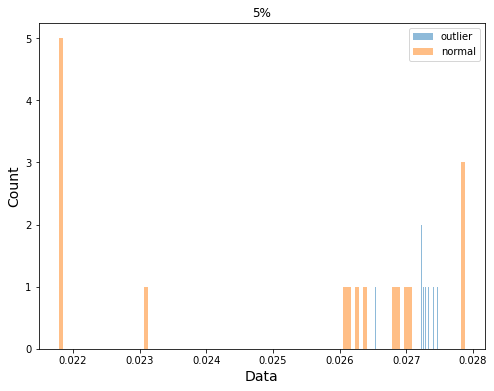

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(five_outlier, bins=100, alpha=0.5, label="outlier")
plt.hist(five_normal, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


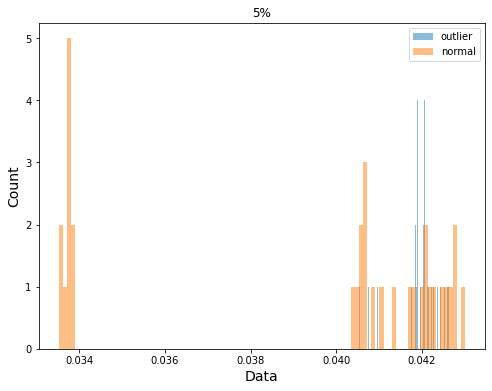

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(ten_outlier, bins=100, alpha=0.5, label="outlier")
plt.hist(ten_normal, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


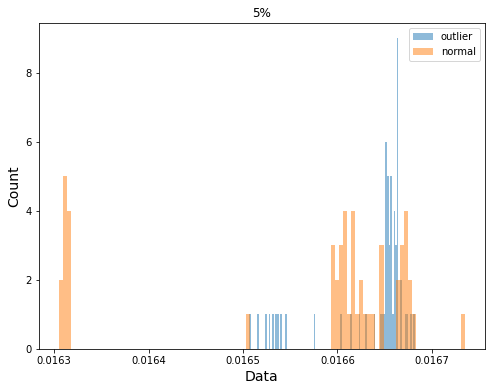

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(fifteen_outlier, bins=100, alpha=0.5, label="outlier")
plt.hist(fifteen_normal, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


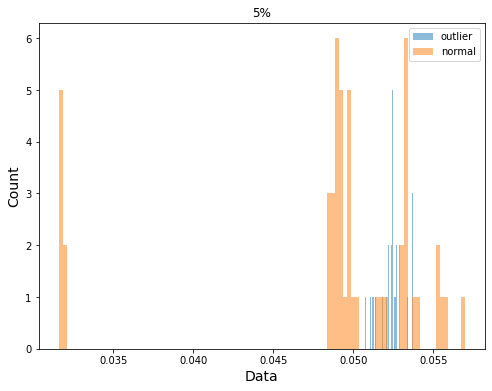

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(twenty_outlier, bins=100, alpha=0.5, label="outlier")
plt.hist(twenty_normal, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


array([0.01738355, 0.01734209, 0.01735372, 0.01734839, 0.01734807,
       0.01733481, 0.0173484 , 0.01735121, 0.01734494, 0.01730568,
       0.01734584, 0.01730206, 0.01733148, 0.01730897, 0.01730884,
       0.01730766, 0.01730705, 0.01729754, 0.01729919, 0.01729556])

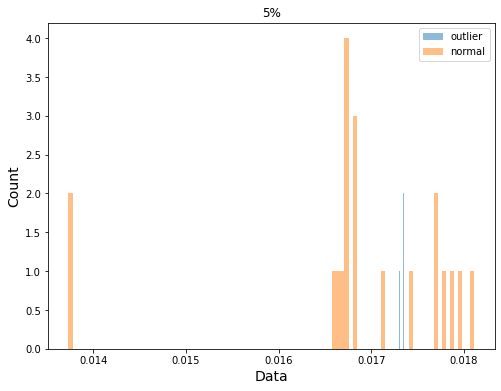

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(twenty_five_outlier, bins=100, alpha=0.5, label="outlier")
plt.hist(twenty_five_normal, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')
twenty_five_outlier

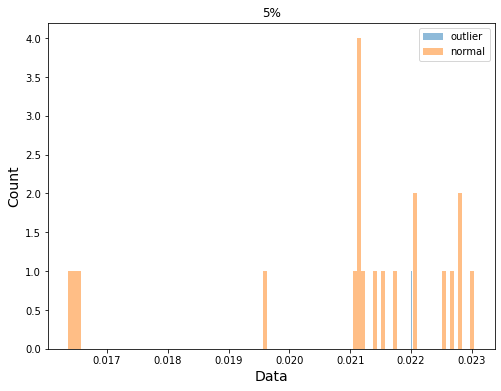

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(thirty_outlier, bins=100, alpha=0.5, label="outlier")
plt.hist(thirty_normal, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


In [ ]:
normalized_normal_05 = (five_normal - np.min(five_normal))/np.ptp(five_normal)
normalized_normal_10 = (ten_normal - np.min(ten_normal))/np.ptp(ten_normal)
normalized_normal_15 = (fifteen_normal - np.min(fifteen_normal))/np.ptp(fifteen_normal)
normalized_normal_20 = (twenty_normal - np.min(twenty_normal))/np.ptp(twenty_normal)
normalized_normal_25 = (twenty_five_normal - np.min(twenty_five_normal))/np.ptp(twenty_five_normal)
normalized_normal_30= (thirty_normal - np.min(thirty_normal))/np.ptp(thirty_normal)
outlierized_outlier_05 = (five_outlier - np.min(five_outlier))/np.ptp(five_outlier)
outlierized_outlier_10 = (ten_outlier - np.min(ten_outlier))/np.ptp(ten_outlier)
outlierized_outlier_15 = (fifteen_outlier - np.min(fifteen_outlier))/np.ptp(fifteen_outlier)
outlierized_outlier_20 = (twenty_outlier - np.min(twenty_outlier))/np.ptp(twenty_outlier)
outlierized_outlier_25= (twenty_five_outlier - np.min(twenty_five_outlier))/np.ptp(twenty_five_outlier)
outlierized_outlier_30= (thirty_outlier - np.min(thirty_outlier))/np.ptp(thirty_outlier)



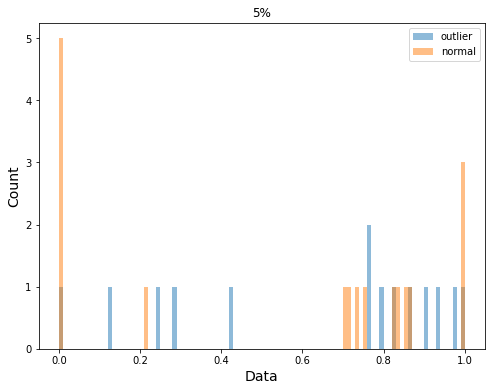

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_outlier_05, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_normal_05, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


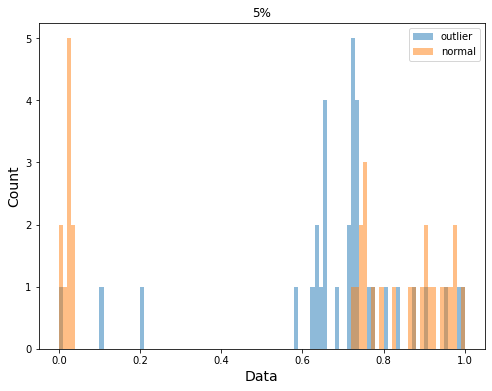

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_outlier_10, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_normal_10, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


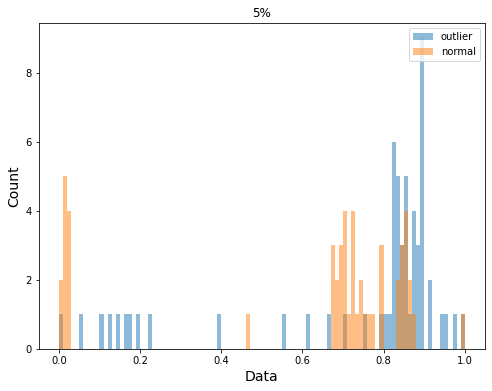

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_outlier_15, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_normal_15, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')

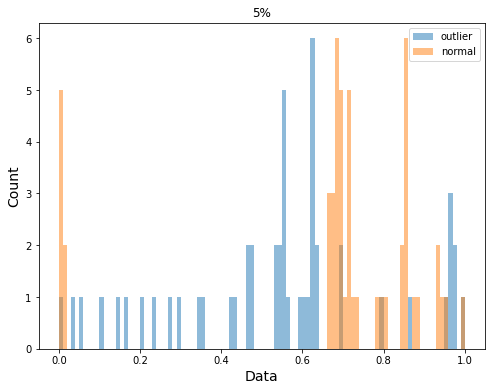

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_outlier_20, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_normal_20, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')

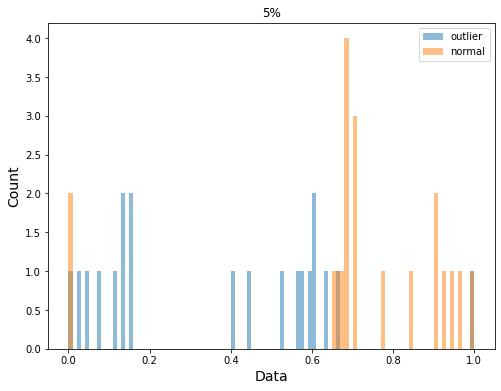

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_outlier_25, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_normal_25, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')

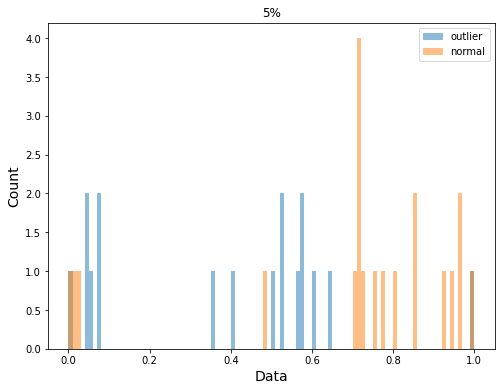

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_outlier_30, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_normal_30, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')

In [ ]:
normalized_exp_normal_05 = np.exp(normalized_normal_05)
normalized_exp_normal_10 = np.exp(normalized_normal_10)
normalized_exp_normal_15 = np.exp(normalized_normal_15)
normalized_exp_normal_20 = np.exp(normalized_normal_20)
normalized_exp_normal_25 = np.exp(normalized_normal_25)
normalized_exp_normal_30= np.exp(normalized_normal_30)

outlierized_exp_outlier_05 = np.exp(outlierized_outlier_05)
outlierized_exp_outlier_10 = np.exp(outlierized_outlier_10)
outlierized_exp_outlier_15 = np.exp(outlierized_outlier_15)
outlierized_exp_outlier_20 = np.exp(outlierized_outlier_20)
outlierized_exp_outlier_25= np.exp(outlierized_outlier_25)
outlierized_exp_outlier_30= np.exp(outlierized_outlier_30)


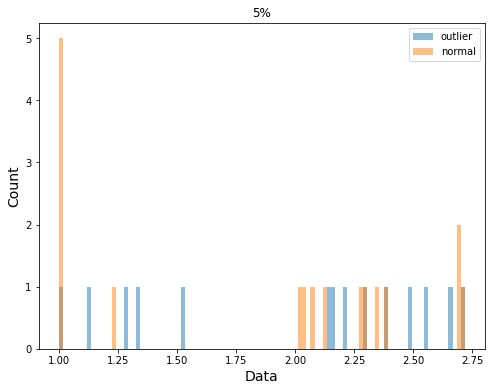

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_exp_outlier_05, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_exp_normal_05, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


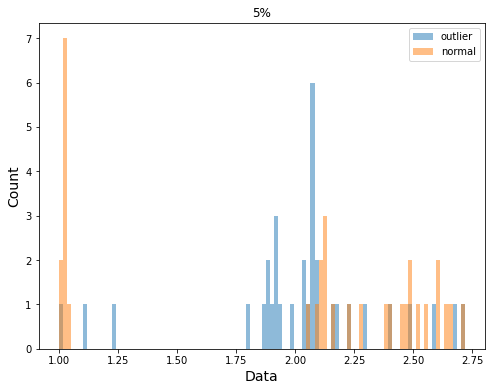

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_exp_outlier_10, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_exp_normal_10, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


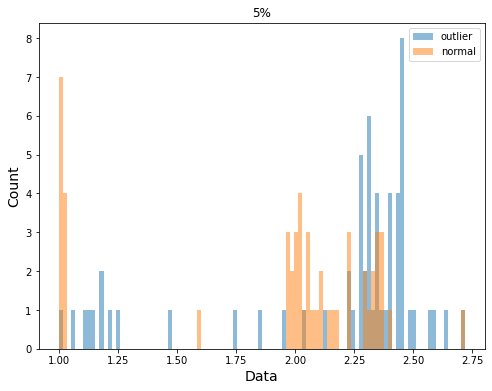

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_exp_outlier_15, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_exp_normal_15, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


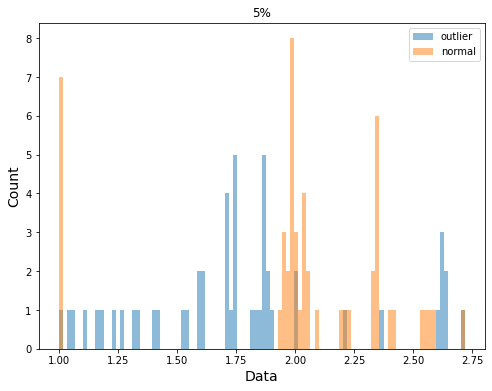

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_exp_outlier_20, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_exp_normal_20, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


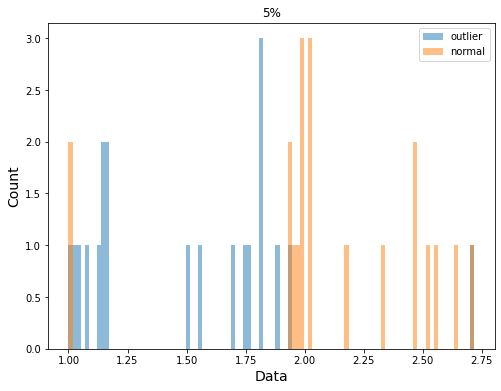

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_exp_outlier_25, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_exp_normal_25, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


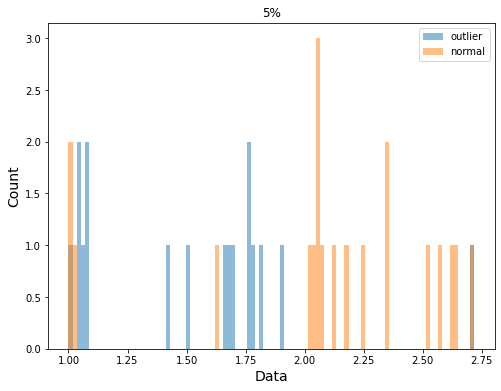

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(outlierized_exp_outlier_30, bins=100, alpha=0.5, label="outlier")
plt.hist(normalized_exp_normal_30, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


In [ ]:
#log transformation
five_normal_log=np.log2(five_normal)
ten_normal_log=np.log2(ten_normal)
fifteen_normal_log=np.log2(fifteen_normal)
twenty_normal_log=np.log2(twenty_normal)
twenty_five_normal_log=np.log2(twenty_five_normal)
thirty_normal_log=np.log2(thirty_normal)



five_outlier_log=np.log2(five_outlier)
ten_outlier_log=np.log2(ten_outlier)
fifteen_outlier_log=np.log2(fifteen_outlier)
twenty_outlier_log=np.log2(twenty_outlier)
twenty_five_outlier_log=np.log2(twenty_five_outlier)
thirty_outlier_log=np.log2(thirty_outlier)

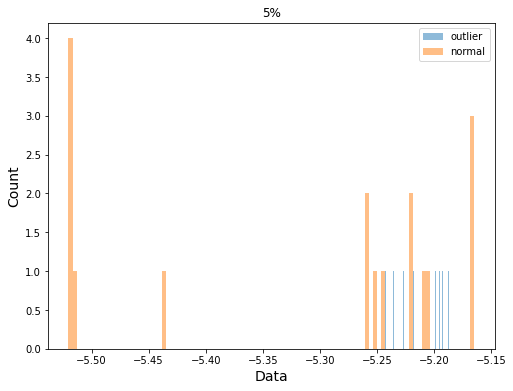

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(five_outlier_log, bins=100, alpha=0.5, label="outlier")
plt.hist(five_normal_log, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


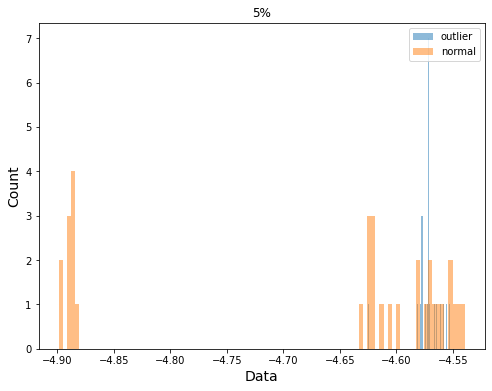

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(ten_outlier_log, bins=100, alpha=0.5, label="outlier")
plt.hist(ten_normal_log, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


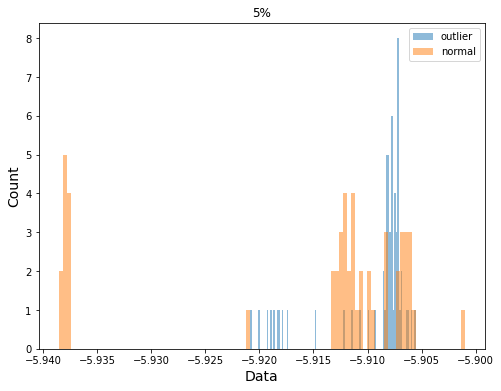

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(fifteen_outlier_log, bins=100, alpha=0.5, label="outlier")
plt.hist(fifteen_normal_log, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


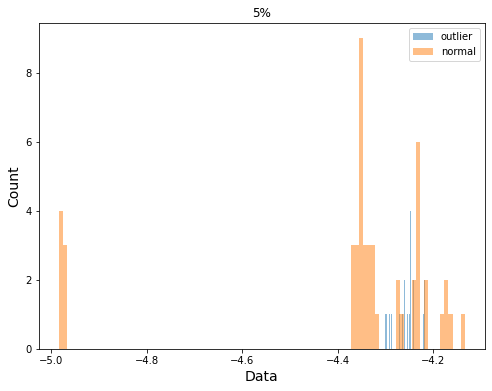

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(twenty_outlier_log, bins=100, alpha=0.5, label="outlier")
plt.hist(twenty_normal_log, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


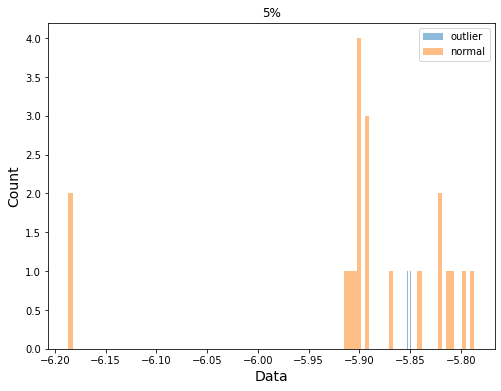

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(twenty_five_outlier_log, bins=100, alpha=0.5, label="outlier")
plt.hist(twenty_five_normal_log, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


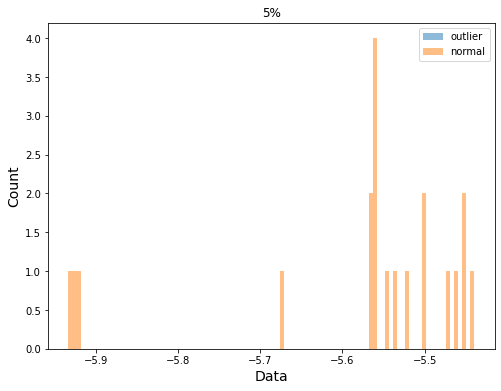

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(thirty_outlier_log, bins=100, alpha=0.5, label="outlier")
plt.hist(thirty_normal_log, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


In [ ]:
#arcsin transformation
five_normal_arcsin=np.arcsin(five_normal)
ten_normal_arcsin=np.arcsin(ten_normal)
fifteen_normal_arcsin=np.arcsin(fifteen_normal)
twenty_normal_arcsin=np.arcsin(twenty_normal)
twenty_five_normal_arcsin=np.arcsin(twenty_five_normal)
thirty_normal_arcsin=np.arcsin(thirty_normal)


five_outlier_arcsin=np.arcsin(five_outlier)
ten_outlier_arcsin=np.arcsin(ten_outlier)
fifteen_outlier_arcsin=np.arcsin(fifteen_outlier)
twenty_outlier_arcsin=np.arcsin(twenty_outlier)
twenty_five_outlier_arcsin=np.arcsin(twenty_five_outlier)
thirty_outlier_arcsin=np.arcsin(thirty_outlier)

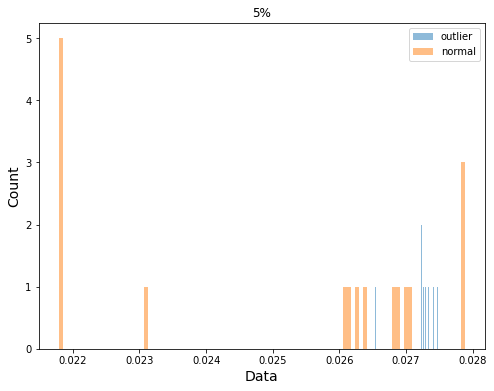

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(five_outlier_arcsin, bins=100, alpha=0.5, label="outlier")
plt.hist(five_normal_arcsin, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


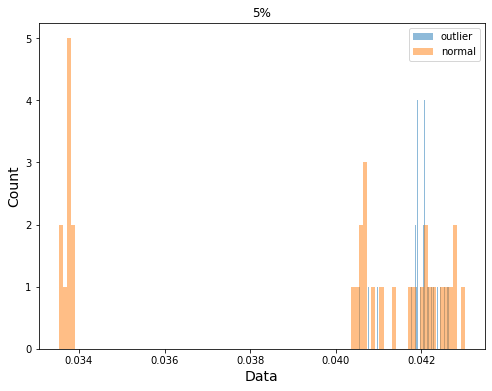

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(ten_outlier_arcsin, bins=100, alpha=0.5, label="outlier")
plt.hist(ten_normal_arcsin, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


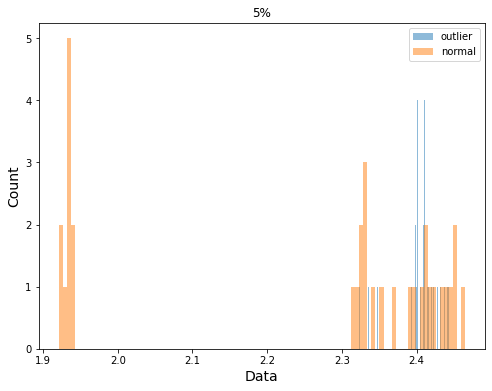

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(np.degrees(ten_outlier_arcsin), bins=100, alpha=0.5, label="outlier")
plt.hist(np.degrees(ten_normal_arcsin), bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


In [ ]:
np.degrees(ten_outlier)
ten_outlier*100
#transform to make the data more spreaded

array([4.21484768, 4.20436859, 4.20676112, 4.20553654, 4.20551926,
       4.20237988, 4.20571387, 4.20643389, 4.20499206, 4.20572758,
       4.20208156, 4.20546949, 4.21330631, 4.22130167, 4.22709942,
       4.23561096, 4.24285263, 4.25203443, 4.25942898, 4.26209569,
       4.19651985, 4.19067413, 4.18588579, 4.18708682, 4.19016182,
       4.18953866, 4.18983966, 4.18381989, 4.18611795, 4.17530805,
       4.09596771, 4.07521605, 4.05286878])

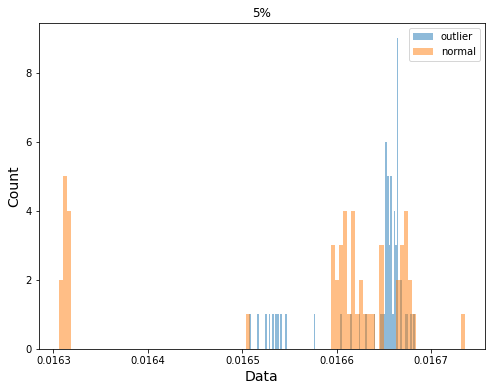

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(fifteen_outlier_arcsin, bins=100, alpha=0.5, label="outlier")
plt.hist(fifteen_normal_arcsin, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


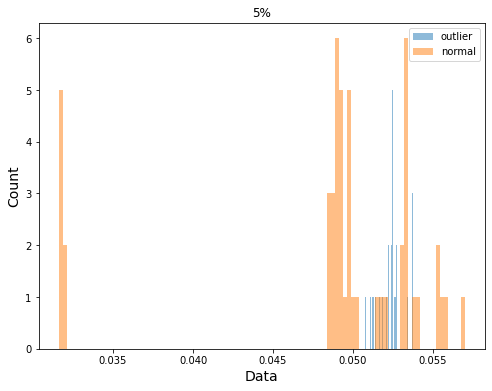

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(twenty_outlier_arcsin, bins=100, alpha=0.5, label="outlier")
plt.hist(twenty_normal_arcsin, bins=100, alpha=0.5, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


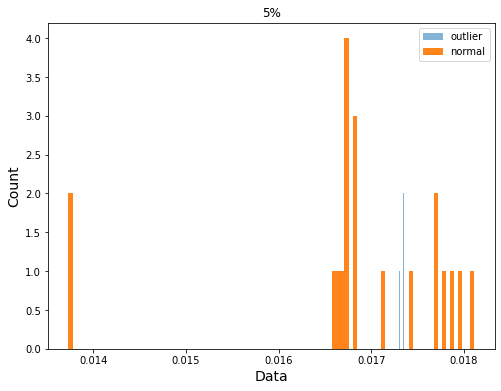

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(twenty_five_outlier_arcsin, bins=100, alpha=0.55, label="outlier")
plt.hist(twenty_five_normal_arcsin, bins=100, alpha=0.95, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


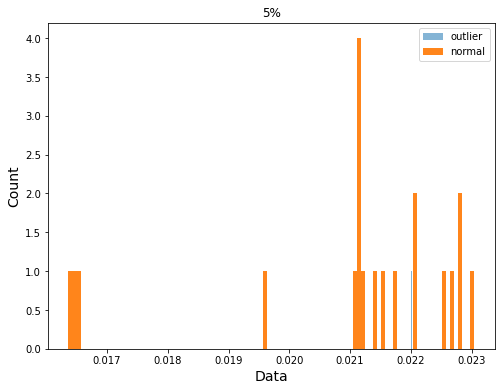

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(thirty_outlier_arcsin, bins=100, alpha=0.55, label="outlier")
plt.hist(thirty_normal_arcsin, bins=100, alpha=0.95, label="normal")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("5%")
plt.legend(loc='upper right')


In [ ]:
#score = (score - np.min(score)) / (np.max(score) - np.min(score)) # map to 0~1
'''(np.mean(np.absolute(encoded[0:1,:]))-np.mean(np.absolute(encoded_gan[0:1,:]))+
np.mean(np.absolute(encoded[1:2,:]))-np.mean(np.absolute(encoded_gan[1:2,:]))+
np.mean(np.absolute(encoded[2:3,:]))-np.mean(np.absolute(encoded_gan[2:3,:]))+
np.mean(np.absolute(encoded[3:4,:]))-np.mean(np.absolute(encoded_gan[3:4,:]))+
np.mean(np.absolute(encoded[4:5,:]))-np.mean(np.absolute(encoded_gan[4:5,:]))+
np.mean(np.absolute(encoded[5:6,:]))-np.mean(np.absolute(encoded_gan[5:6,:]))+
np.mean(np.absolute(encoded[6:7,:]))-np.mean(np.absolute(encoded_gan[6:7,:]))+
np.mean(np.absolute(encoded[7:8,:]))-np.mean(np.absolute(encoded_gan[7:8,:]))+
np.mean(np.absolute(encoded[8:9,:]))-np.mean(np.absolute(encoded_gan[8:9,:]))+
np.mean(np.absolute(encoded[9:10,:]))-np.mean(np.absolute(encoded_gan[9:10,:])))/10'''

In [ ]:
ganomaly_transpose_score_normal_05=np.array([0.012479911744594573,
0.013347318768501282,
0.013419777154922485,
0.013299494981765747,
0.01265612244606018,
0.012490302324295044,
0.013652405142784119,
0.013379991054534912,
0.013352030515670776,
0.01335996389389038,
0.012850049138069152,
0.012638211250305176,
0.013327203691005707,
0.013010619580745697,
0.01397838443517685])
ganomaly_transpose_score_anomaly_05=np.array([0.013561904430389404,
0.013555032014846802,
0.013581575453281402,
0.013614499568939209,
0.013650724291801452,
0.013687700033187866,
0.013713015615940094,
0.013750045001506806,
0.01376759260892868,
0.013197493553161622,
0.01305781751871109,
0.013019312918186188,
0.01290448009967804,
0.01278097927570343])
ganomaly_transpose_score_anomaly_10=np.array([0.20302047729492187,
0.20339686870574952,
0.20541934967041015,
0.21409618854522705,
0.2044393539428711,
0.2138528347015381,
0.20343005657196045,
0.20282092094421386,
0.20341346263885499,
0.20429935455322265,
0.214339542388916,
0.19928431510925293,
0.21458289623260499,
0.2021171808242798])
ganomaly_transpose_score_normal_10=np.array([[0.22634510993957518,
0.4617167472839355,
0.13418893814086913,
0.21179938316345215,
0.1770801544189453,
0.15192408561706544,
0.2625122547149658,
0.20118098258972167,
0.2693159818649292,
0.5580992698669434,
0.16531916856765747,
0.25863080024719237,
0.1869502067565918,
0.2549459934234619]])

In [ ]:
print(np.mean(ganomaly_transpose_score_normal_05)*1000)
print(np.mean(ganomaly_transpose_score_anomaly_05)*1000)
print(np.mean(ganomaly_transpose_score_normal_10)*1000)
print(np.mean(ganomaly_transpose_score_anomaly_10)*1000)


In [ ]:
# tried to make the testing automatic. learn later
'''for i in range(1,len(outlier_index_05_list)):
  x_train1=svm_normal_05_all.iloc[0:4240,:].to_numpy()
  x_test1=all.iloc[60:70,:].to_numpy()
  x_ok1=x_train1.copy()
  def reshape_x(x):
    new_x = np.empty((len(x), height, width))
    for i, e in enumerate(x):
        new_x[i] = cv2.resize(e, (width, height))
    return np.expand_dims(new_x, axis=-1) / 127 - 1
 x_ok1 = reshape_x(x_ok1)
 x_test1 = reshape_x(x_test1)

  x_test1=all.iloc[i*10:i*10+10,:].to_numpy()
  encoded = g_e.predict(x_test1)
  gan_x = g.predict(x_test1)
  encoded_gan = g_e.predict(gan_x)
  score = np.sum(np.absolute(encoded - encoded_gan ), axis=-1)
  print(np.mean(np.absolute(encoded[0:1,:]))-np.mean(np.absolute(encoded_gan[0:1,:])))
for i in range(1,len(outlier_index_05_list)):
  x_test1=all.iloc[i*10:i*10+10,:].to_numpy()
  encoded = g_e.predict(x_test1)
  gan_x = g.predict(x_test1)
  encoded_gan = g_e.predict(gan_x)
  score = np.sum(np.absolute(encoded - encoded_gan ), axis=-1)
  print(np.mean(np.absolute(encoded[0:1,:]))-np.mean(np.absolute(encoded_gan[0:1,:])))'''

In [ ]:
# check this to measure the distance between two distribution
# https://stats.stackexchange.com/questions/425040/how-to-measure-the-statistical-distance-between-two-frequency-distributions